# Export and import from Flower bulbs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import seaborn as sns

Create the function to transform the code that generate less than 1% of total dollars in "Othe Flower bulbs" and one class to associate codes with colors

In [2]:
def define_code(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Other Flower bulbs"

class ColorGenerator:
    def __init__(self):
        self.colors = ['#edd09e', '#1de286', '#5d680a', '#296d0a', '#02ede0', '#ad81d1', '#86afe8',
                       '#69e234', '#cae01d', '#e894e3', '#0c633b', '#d6e088', '#e52bda', '#e01a8d',
                       '#d18e91', '#63440d', '#560909', '#db8ab9', '#8b8c7e', '#86ceca', '#f2aa2e',
                       '#f21515', '#f9acac', '#081156', '#700e12', '#ef1019', '#2075ea', '#390f5b',
                       '#8de0b9', '#8823db', '#afe896', '#ba96ab', '#8e0286', '#8e0153']
        self.colors = ['yellow', 'blue', 'green', 'purple','red', 'orange', 'black', "brown"]
        self.index_color = 0
        self.dict_color = {}
        
    def color(self, code):
        if code in self.dict_color:
            return self.dict_color[code]
        self.dict_color[code] = self.colors[self.index_color]
        self.index_color += 1
        return self.dict_color[code]
    
    def reset(self):
        self.index_color = 0
        self.dict_color = {}
        
generator = ColorGenerator()


Define path of file and columns that we need to analize

In [3]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR","TOTALVALORFOB", "CODIGOARANCEL", "GROUP"]
usecols_import =  ["YEAR", "CIF", "ARANC_NAC", "GROUP"]

Read data, filter that to only have the Flower bulbs group, change the columns name and concatenate the files in one big file.

In [4]:
data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data
data_export["TYPE"] = "Export"
data_import["TYPE"] = "Import"

data_export = data_export[data_export["GROUP"] == "Flower bulbs"]
data_import = data_import[data_import["GROUP"] == "Flower bulbs"]

data_export.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]
data_import.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]

final_data = pd.concat([data_import, data_export])


Print the table

In [5]:
final_data[["USD", 'CODIGO', "TYPE", "YEAR"]].groupby(['CODIGO', "TYPE", "YEAR"]).sum().unstack().replace(np.nan, 0)

USD                                         \
YEAR                        2011         2012         2013         2014   
CODIGO       TYPE                                                         
Anemona      Import         0.00         0.00         0.00         0.00   
Dhalia       Import         0.00         0.00         0.00         0.00   
Fresia       Import         0.00         0.00         0.00     72959.26   
Gladioulus   Import         0.00     62659.80     61015.20    340751.35   
Hippeastrum  Export         0.00         0.00     10800.00         0.00   
             Import         0.00         0.00         0.00     34184.85   
Hyacinthus   Export         0.00         0.00         0.00         0.00   
             Import         0.00         0.00         0.00    158561.16   
Iris         Import         0.00         0.00    506786.42    901319.28   
Ixia         Import         0.00         0.00         0.00         0.00   
Lilium       Export  62171651.28  47514017.56  40030349.23  35074735.68   
             Import  14976654.63  10903665.84  12271615.28  15927904.47   
Ornithogalum Export         0.00         0.00         0.00         0.00   
Others       Export     83946.25         0.00         0.00         0.00   
             Import   2248460.24   2211013.32   2076701.52   2044670.66   
Paeonia      Import         0.00    146419.46      6436.40         0.00   
Ranunculus   Import         0.00         0.00      1271.89         0.00   
Sparaxis     Import         0.00         0.00         0.00         0.00   
Tulipa       Export   4037092.52   4839338.44   6811450.54   4708742.45   
             Import   1519353.62   1489169.71    598868.44    617618.65   
Zantedeschia Export   1536299.85    460933.75     99511.94      9213.50   
             Import    164774.91     11273.76    112571.30    291795.51   

                                                           
YEAR                        2015         2016        2017  
CODIGO       TYPE                                          
Anemona      Import     18497.58     14592.88     9889.88  
Dhalia       Import     23880.93      9082.09        0.00  
Fresia       Import    146806.94     31105.31    27569.81  
Gladioulus   Import    799106.83    800644.66   511939.45  
Hippeastrum  Export         0.00         0.00        0.00  
             Import     51532.44     58339.13    61414.74  
Hyacinthus   Export         0.00         0.00    12473.47  
             Import         0.00     94386.76   141218.86  
Iris         Import    456694.68    533885.40   154737.54  
Ixia         Import         0.00      5502.87     9613.47  
Lilium       Export  24550017.22  25528212.22  2406066.20  
             Import  15920405.96  15905114.74  9543782.94  
Ornithogalum Export         0.00      7488.00        0.00  
Others       Export     18568.70     21978.80    12473.47  
             Import   1650123.25   1302886.16  1523801.60  
Paeonia      Import         0.00    151234.69     3600.67  
Ranunculus   Import       951.82     10321.51    71202.25  
Sparaxis     Import         0.00      9838.99     9613.47  
Tulipa       Export   2794399.69   2730128.39   854881.40  
             Import    375210.36    498707.88   665405.16  
Zantedeschia Export         0.00         0.00        0.00  
             Import    203624.41    310954.70    97008.10

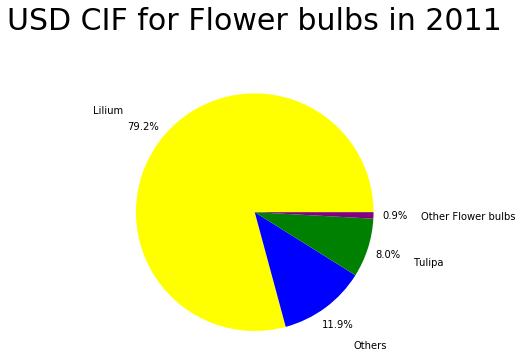

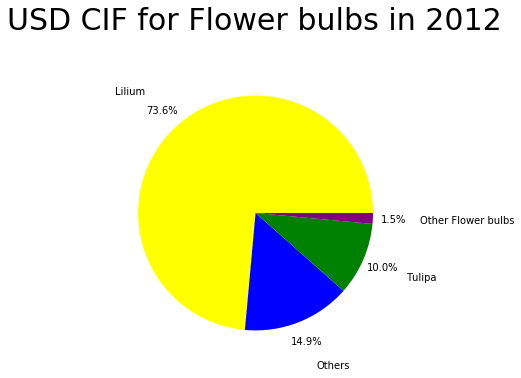

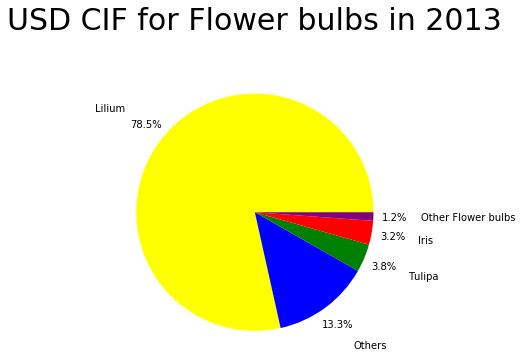

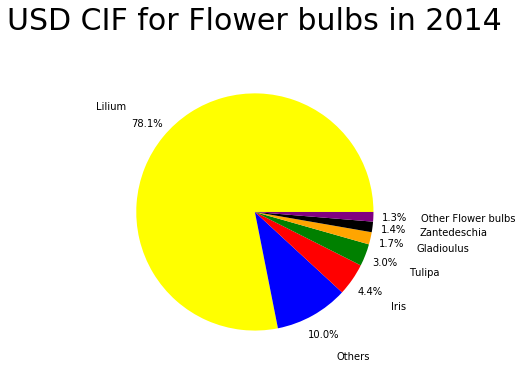

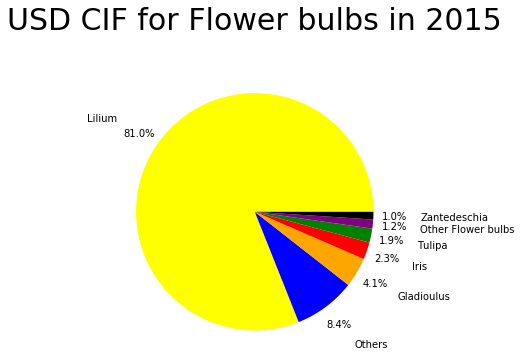

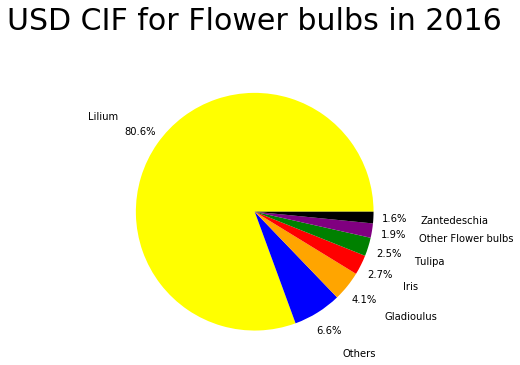

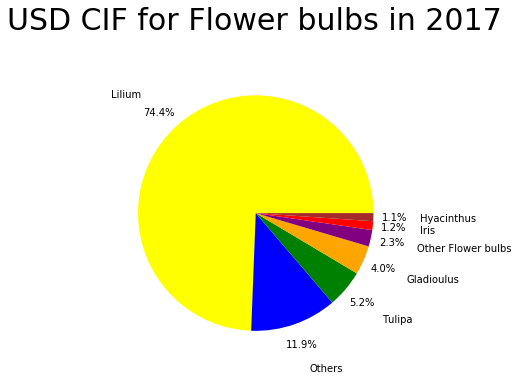

In [6]:
for year in range(2011, 2018):
    temporal_data = data_import[data_import["YEAR"] == year]

    if not temporal_data.empty:
        sums = temporal_data.groupby(['CODIGO']).sum().reset_index()
        total = sums["USD"].sum()

        sums['NAME_CODE'] = sums.apply(lambda x: define_code(x, total), axis=1)

        aux = sums[["NAME_CODE", "USD"]].groupby("NAME_CODE").sum()
        aux = aux.sort_values("USD", ascending=False)


        plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                labeldistance=1.4)


        plt.axis('equal')
        plt.tight_layout()

        plt.title("USD CIF for Flower bulbs in {}".format(year), fontdict ={'fontsize': 30}, y=1.18)

        plt.savefig("USD CIF for Flower bulbs in {}".format(year), bbox_inches='tight')
        plt.show()
generator.reset()

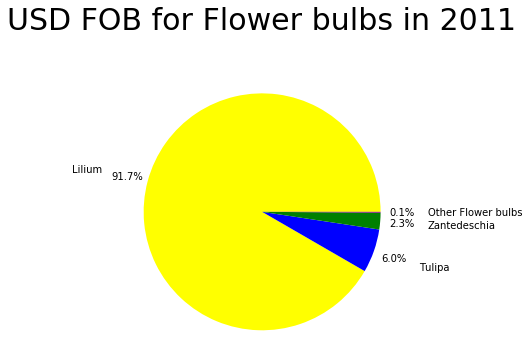

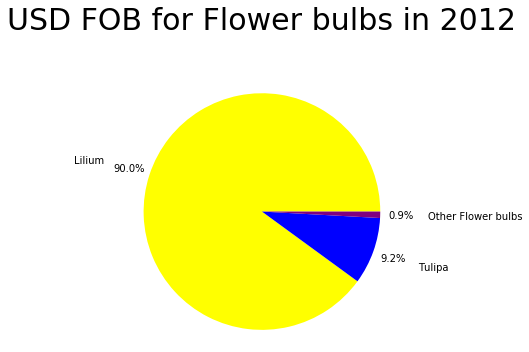

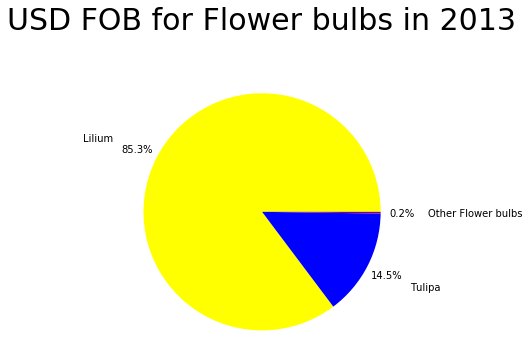

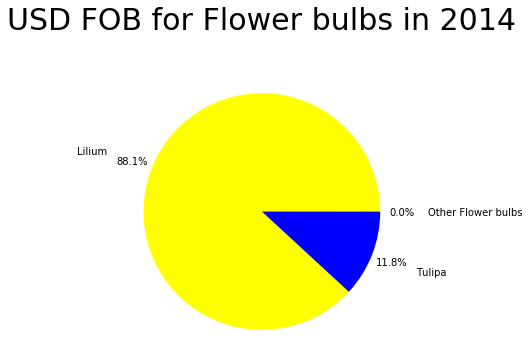

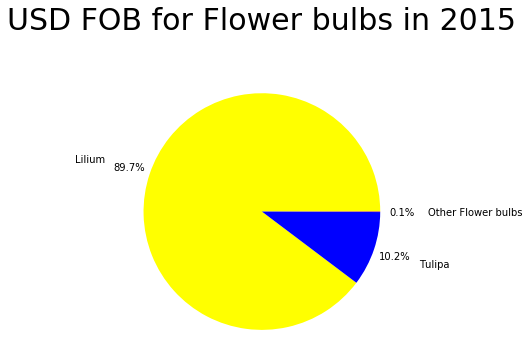

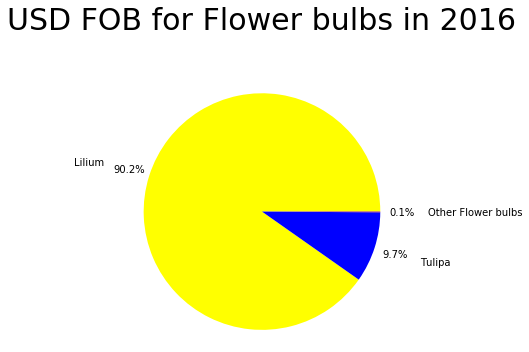

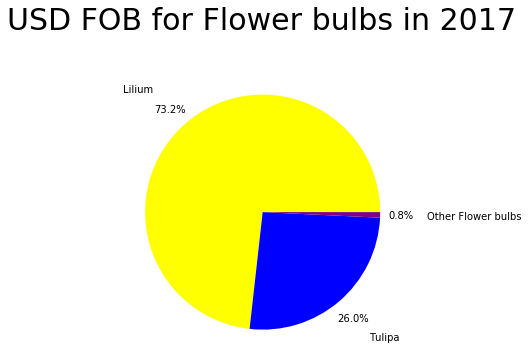

In [7]:
for year in range(2011, 2018):
    temporal_data = data_export[data_export["YEAR"] == year]

    if not temporal_data.empty:
        sums = temporal_data.groupby(['CODIGO']).sum().reset_index()
        total = sums["USD"].sum()

        sums['NAME_CODE'] = sums.apply(lambda x: define_code(x, total), axis=1)

        aux = sums[["NAME_CODE", "USD"]].groupby("NAME_CODE").sum()
        aux = aux.sort_values("USD", ascending=False)


        plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                labeldistance=1.4)


        plt.axis('equal')
        plt.tight_layout()

        plt.title("USD FOB for Flower bulbs in {}".format(year), fontdict ={'fontsize': 30}, y=1.18)

        plt.savefig("USD FOB for Flower bulbs in {}".format(year), bbox_inches='tight')
        plt.show()